In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

# Load the data
file_path = 'genelab_osd.txt'
data = pd.read_csv(file_path, delimiter='\t')

# Minor error/formatting corrections to data
data['technologyType'] = data['technologyType'].replace('single-cell RNA Sequencing', 'single-cell RNA sequencing')

data['technologyType'] = data['technologyType'].replace('DNA microarray', 'microarray')

# Helper function to sort measures into omics categories
def assign_category(measurement_type):
    categories = {
        'genomics': ["genome sequencing", "copy number variation profiling",
                         "deletion pool profiling", "Amplicon Sequencing",
                         "Genome-wide Association Study"],
            'transcriptomics': ["transcription profiling", "RNA methylation profiling"],
            'proteomics': ["protein expression profiling", "protein quantification",
                           "phosphoprotein profiling", "protein-DNA binding site identification",
                           "protein identification"],
            'metabolomics': ["metabolite profiling"],
            'epigenomics': ["DNA methylation profiling", "Chromatin Accessibility"],
            'metagenomics': ["metagenome profiling",
                                                          "Metagenomic sequencing",
                                                          "environmental gene survey"],
            'non-omics': ["Molecular Cellular Imaging", "Behavior", "Bone Microstructure",
                          "Echocardiogram", "Histological Assay", "Image Analysis",
                          "Morphometric analysis", "Bone biomechanical measurement",
                          "Calcium Uptake", "histology", "Intraocular Pressure", "Flow Cytometry"]
        }

    for category, measurements in categories.items():
        if measurement_type in measurements:
            return category

    return "Uncategorized"

# Assign an omics type to each row based on measurementType
data['Category'] = data['measurementType'].apply(assign_category)

# category counts
print(data['Category'].value_counts())


# this is same classification that Henry decidid for his figure

FileNotFoundError: [Errno 2] No such file or directory: 'genelab_osd.txt'

In [ ]:
data

,OSD-id,hits,publicReleaseDate,publicReleaseDateYear,technologyPlatform,technologyType,measurementType,OrganismCount,Organism,Factors,Category
0,OSD-1,1,11-Dec-2013,2013,Affymetrix,microarray,transcription profiling,1,Drosophila melanogaster,Spaceflight;Infection,transcriptomics
1,OSD-2,1,01-Apr-2011,2011,Agilent,microarray,transcription profiling,1,Homo sapiens,Ionizing Radiation;Absorbed Radiation Dose,transcriptomics
2,OSD-3,1,01-Sep-2011,2011,Affymetrix,microarray,transcription profiling,1,Drosophila melanogaster,Developmental Stage;Spaceflight;Cosmic Radiation,transcriptomics
3,OSD-4,1,10-Mar-2010,2010,Affymetrix,microarray,transcription profiling,1,Mus musculus,Spaceflight,transcriptomics
4,OSD-5,1,09-Feb-2006,2006,Affymetrix,microarray,transcription profiling,1,Homo sapiens,simulated microgravity,transcriptomics
...,...,...,...,...,...,...,...,...,...,...,...
540,OSD-628,1,12-Sep-2023,2023,Nikon SIM A1 Laser scanning Confocal Microscope,Confocal,Molecular Cellular Imaging,1,Penicillium rubens,Spaceflight;Growth Environment;Time,non-omics
541,OSD-640,1,24-Aug-2023,2023,FACS Canto2(Becton Dickinson),Flow Cytometry,Flow Cytometry,1,Mus musculus,Hindlimb Unloading;Sex;Housing Condition;Ioniz...,non-omics
542,OSD-654,2,04-Oct-2023,2023,SkyScan 1176 V1 build 12,Micro-Computed Tomography,Bone Microstructure,1,Mus musculus,Spaceflight;Space Mission;Genotype,non-omics
543,OSD-654,2,04-Oct-2023,2023,OsteoSys InSIGHT,Dual-Energy X-Ray Absorptiometry,Bone Microstructure,1,Mus musculus,Spaceflight;Space Mission;Genotype,non-omics


Table of Factors counts:
Factors
Spaceflight                                        92
Spaceflight;Strain                                 13
Microgravity Simulation                            11
Spaceflight;Time                                   11
Spaceflight;Genotype                                8
                                                   ..
Treatment;Organism Part;Microgravity Simulation     1
Radiation;Timepoint                                 1
mouse strain;ionizing radiation                     1
ionizing radiation;Neoplasm                         1
Microgravity;Antibiotic concentration               1
Name: count, Length: 237, dtype: int64


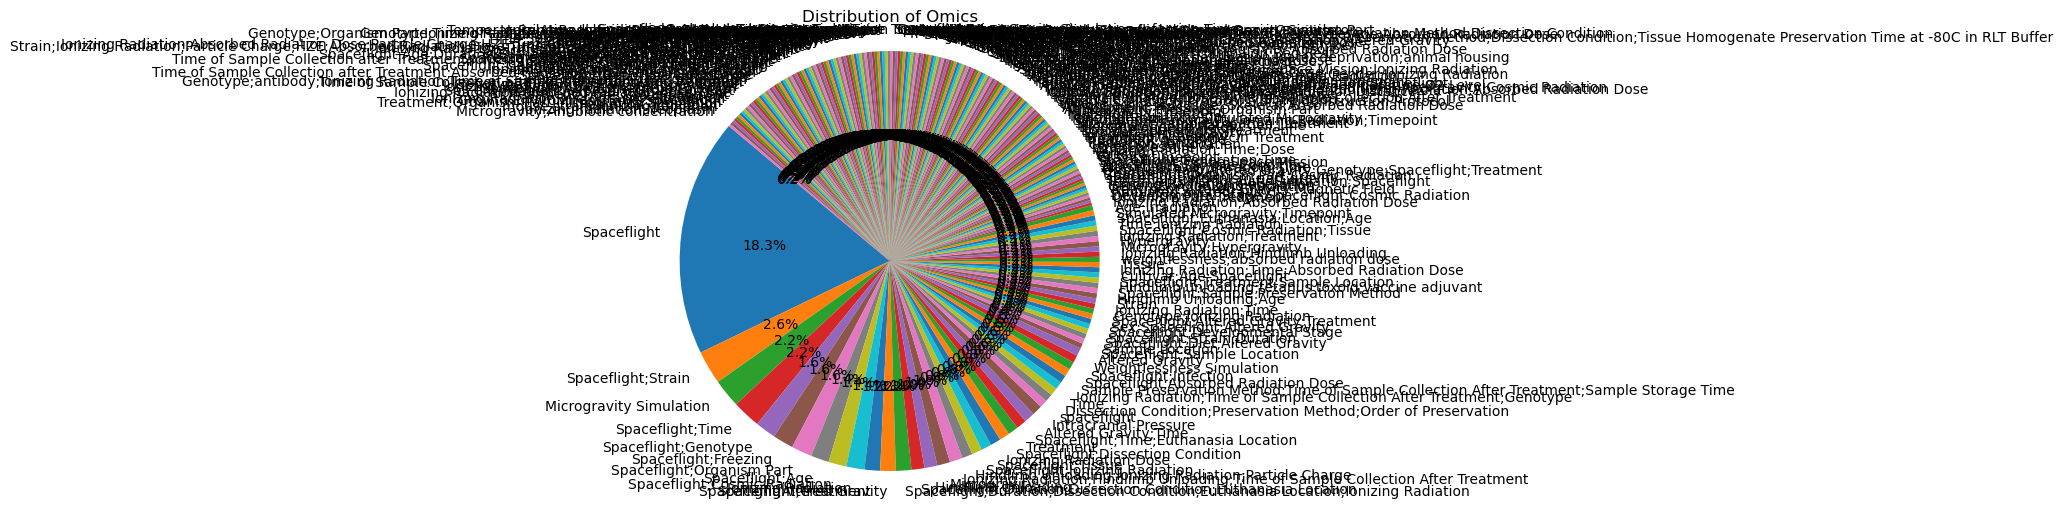

In [ ]:
# Drop non-omics rows
indices_to_drop = data[data['Category'] == 'non-omics'].index
omics_data = data.drop(indices_to_drop) # data

omics_category_counts = omics_data['Factors'].value_counts()

# table of unique omics and their counts
print("Table of Factors counts:")
print(omics_category_counts)

#  plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(omics_category_counts, labels=omics_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Omics')
plt.show()

In [ ]:
omics_data

,OSD-id,hits,publicReleaseDate,publicReleaseDateYear,technologyPlatform,technologyType,measurementType,OrganismCount,Organism,Factors,Category
0,OSD-1,1,11-Dec-2013,2013,Affymetrix,microarray,transcription profiling,1,Drosophila melanogaster,Spaceflight;Infection,transcriptomics
1,OSD-2,1,01-Apr-2011,2011,Agilent,microarray,transcription profiling,1,Homo sapiens,Ionizing Radiation;Absorbed Radiation Dose,transcriptomics
2,OSD-3,1,01-Sep-2011,2011,Affymetrix,microarray,transcription profiling,1,Drosophila melanogaster,Developmental Stage;Spaceflight;Cosmic Radiation,transcriptomics
3,OSD-4,1,10-Mar-2010,2010,Affymetrix,microarray,transcription profiling,1,Mus musculus,Spaceflight,transcriptomics
4,OSD-5,1,09-Feb-2006,2006,Affymetrix,microarray,transcription profiling,1,Homo sapiens,simulated microgravity,transcriptomics
...,...,...,...,...,...,...,...,...,...,...,...
529,OSD-612,2,01-Aug-2023,2023,Illumina,single-cell RNA sequencing,transcription profiling,1,Mus musculus,Spaceflight,transcriptomics
530,OSD-612,2,01-Aug-2023,2023,Illumina,single-cell ATAC-seq,Chromatin Accessibility,1,Mus musculus,Spaceflight,epigenomics
531,OSD-613,2,01-Aug-2023,2023,Illumina,single-cell RNA sequencing,transcription profiling,1,Mus musculus,Spaceflight;Age,transcriptomics
532,OSD-613,2,01-Aug-2023,2023,Illumina,single-cell ATAC-seq,Chromatin Accessibility,1,Mus musculus,Spaceflight;Age,epigenomics


/var/folders/94/rzsrkvpd7xv9p8nh_3hblqv40000gp/T/ipykernel_8823/91923518.py:110: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Factor connection counts', shrink=0.5)


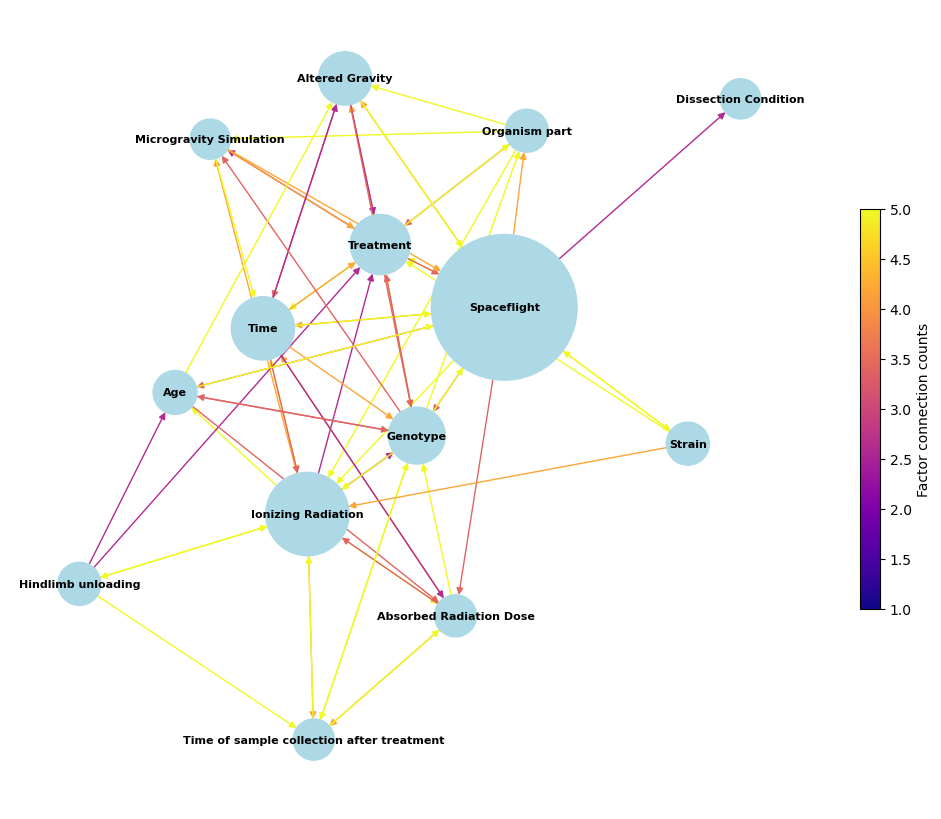

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random

# Sample rows of factors
#rows = ["a;b;c", "b;f", "b", "a;g", "c;d;e", "f;g", "b;c", "a;b"]
rows=omics_data['Factors']


# Define a dictionary to perform replacements
factor_replacements = {
    "time": "Time",
    "Tiime": "Time",
    "absorbed radiation dose": "Absorbed Radiation Dose",
    "age": "Age",
    "Gravity, Altered": "Gravity",
    # Add more replacements as needed
    'Bystander Effect':'Bystander',
    'hindlimb unloading': 'Hindlimb unloading',
    'Hindlimb Unloading': 'Hindlimb unloading',
    'Ionzing Radiation': 'Ionizing Radiation',
    'Radiation, Ionzing': 'Ionizing Radiation',
    'Irradiated': 'Irradiation',
    'ionizing radiation': 'Ionizing Radiation',
    'light cycle': 'Light Cycle',
    'organism part': 'Organism part',
    'Organism Part': 'Organism part',
    'environmentalstress': 'environmental stress',
    'weightlessness': 'Weightlessness',
    'timepoint': 'Timepoint',
    'treatment': 'Treatment',
    'temperature': 'Temperature',
    'dose': 'Dose',
    'strain': 'Strain',
    'generation': 'Generation',
    'genotype': 'Genotype',
    'gravity': 'Gravity',
    'gravitation': 'Gravity',
    'radiation': 'Radiation',
    'radiation dose': 'Radiation Dose',
    'space flight': 'Spaceflight',
    'spaceflight': 'Spaceflight',
    'sex': 'Sex',
    'simulated microgravity': 'Simulated Microgravity',
    'Time of Sample Collection After Treatment': 'Time of sample collection after treatment',
    'Time of Sample Collection after Treatment': 'Time of sample collection after treatment',
    'generation number': 'Generation',
    'hypergravity': 'Hypergravity',
    'individual': 'Individual',
    'mouse strain': 'Strain',
    'Simulated microgravity': 'Simulated Microgravity'
}

# Function to apply replacements to a factor
def apply_replacements(factor):
    return factor_replacements.get(factor, factor)

# Preprocess the factors and create a new list
preprocessed_factors = [apply_replacements(factor) for row in rows for factor in row.split(';')]

# Count preprocessed factor occurrences
factor_counts = Counter(preprocessed_factors)

# Initialize a directed graph
knowledge_graph = nx.DiGraph()

# Set a threshold for minimum occurrences
min_occurrences = 20

# Split the rows and add nodes and edges to the graph for factors that meet the threshold
for row in rows:
    factors = row.split(";")

    if len(factors) > 1:
        # Add edges for relationships if both factors meet the threshold
        for i in range(1, len(factors)):
            factor1 = apply_replacements(factors[i-1])
            factor2 = apply_replacements(factors[i])
            if factor_counts[factor1] >= min_occurrences and factor_counts[factor2] >= min_occurrences:
                knowledge_graph.add_edge(factor1, factor2, connection_count=random.randint(1, 5))  # Assign a random connection count (you can replace this with your actual data)

    # Add nodes for individual factors that meet the threshold
    for factor in factors:
        preprocessed_factor = apply_replacements(factor)
        if factor_counts[preprocessed_factor] >= min_occurrences:
            knowledge_graph.add_node(preprocessed_factor, size=factor_counts[preprocessed_factor] * 40)  # Adjust the scaling factor for node size

# Extract node sizes and edge connection counts
node_sizes = [data['size'] for _, data in knowledge_graph.nodes(data=True)]
edge_connection_counts = [data['connection_count'] for _, _, data in knowledge_graph.edges(data=True)]

# Use kamada_kawai_layout to ensure non-overlapping nodes
pos = nx.kamada_kawai_layout(knowledge_graph)

# You can color the arrows based on the connection count
edge_colors = [plt.cm.plasma(0.2 + 0.2 * count) for count in edge_connection_counts]  # Adjust the colormap and range as needed

# Create a color bar legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(edge_connection_counts), vmax=max(edge_connection_counts)))
sm._A = []  # Fake the scalar mappable


# Create a figure with specific dimensions and adjust the margins
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust the margins as needed

# Visualize the graph with non-overlapping nodes, reduced text size, and colored arrows
nx.draw(knowledge_graph, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', width=1.0, edge_color=edge_colors, arrows=True, edge_cmap=plt.cm.plasma)
plt.colorbar(sm, label='Factor connection counts', shrink=0.5)

# Create a custom legend for node sizes
sizes = [4, 8, 12]  # Define the sizes you want to show in the legend
legend_labels = ["Size 1", "Size 2", "Size 3"]  # Labels for each size

## Create a legend for node sizes
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=size, label=label) for size, label in zip(sizes, legend_labels)]
#plt.legend(handles=legend_handles, title='Node Sizes', loc='upper right')


plt.savefig("knowledge graph-Factors-Omics.pdf", format='pdf')
plt.show()





In [ ]:
#print unique factors

uni = np.unique(preprocessed_factors)

for element in uni:
    print(element)

#end

Absorbed Radiation Dose
Accession
Age
Altered Gravity
Altered Gravity Simulator
Altitude
Antibiotic concentration
Atmospheric Composition
Atmospheric Pressure
Bed Rest
Bleomycin Treatment
Bystander
CO2 Concentration
Carcass Preservation Method
Cell Line
Cell cycle phase
Clinical Treatment
Collection Date
Cosmic Radiation
Cultivar
Culture Condition
Developmental Condition
Developmental Stage
Diet
Dissection Condition
Dissection Timeline
Donor
Dose
Dry Immersion
Duration
Ecotype
Electromagnetic Fields
Euthanasia Location
Euthanasia Method
Exercise
Experimental Campaign
Fractionated Dose
Freezing
Gender
Generation
Genotype
Gravity
Ground Based Facility
Growth Cycle
Growth Environment
Growth Time
HZE
Hindlimb unloading
Hypergravity
Individual
Infection
Intracranial Pressure
Ionizing Radiation
Irradiation
Library Construction Protocol
Light
Light Cycle
Magnetic Field
Microgravity
Microgravity Simulation
Mitochondrial Status
Muscle, Skeletal
Neoplasm
Nutrition
O2 Level
Order of Preservation
